## RNN con California Housing

## Librerias

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing

# Redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras import layers


## Descarga y carga de datos

In [2]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

features_names = housing.feature_names

## Crear un DataFrame

In [3]:
df = pd.DataFrame(X,columns = features_names)

df['Price'] = y

## Primera Exploración

In [4]:
print(f"Tamaño del dataset{df.shape}")
print("\nInformación de las columnas:")
print(df.info())


Tamaño del dataset(20640, 9)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


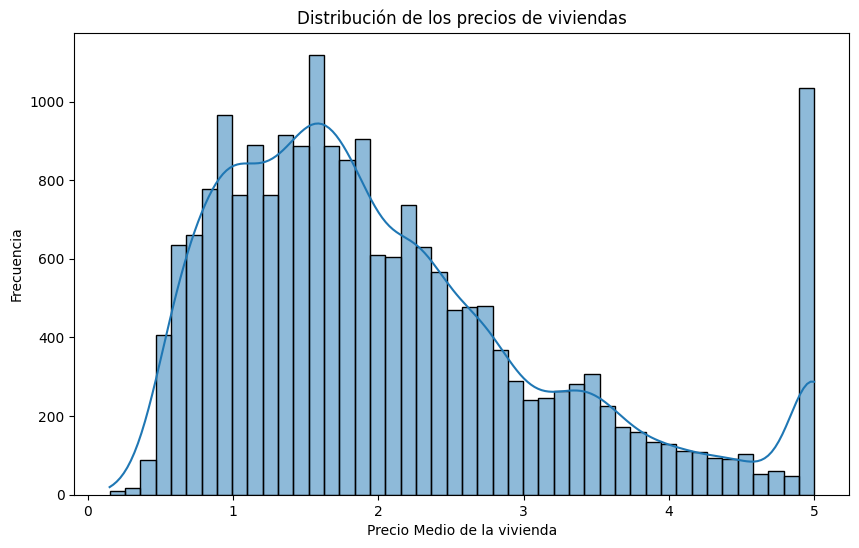

In [6]:
# Visualicacion de la distribución del precio de la vivienda
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],kde=True)
plt.title('Distribución de los precios de viviendas')
plt.xlabel('Precio Medio de la vivienda')
plt.ylabel('Frecuencia');

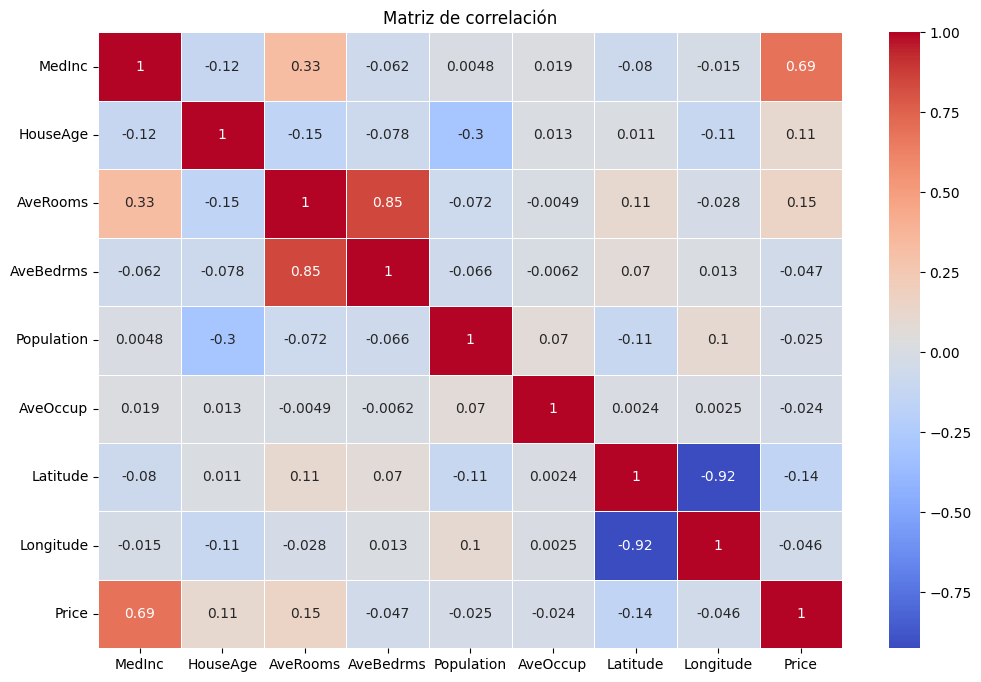

In [7]:
# Matriz de correlación
plt.figure(figsize=(12,8))
correlacion_matrix = df.corr()

sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación');


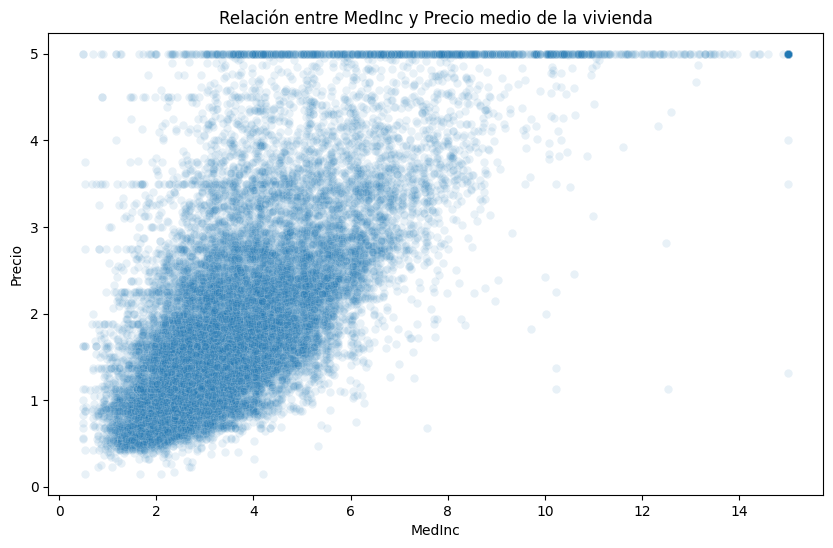

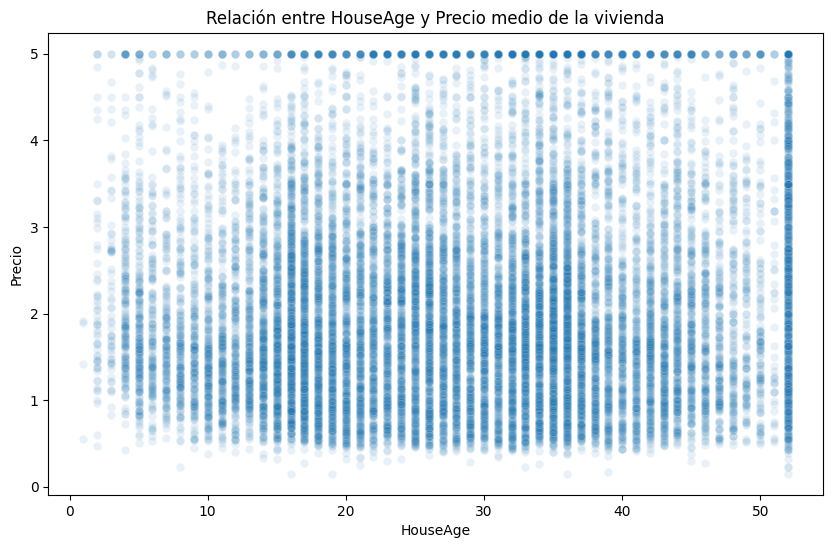

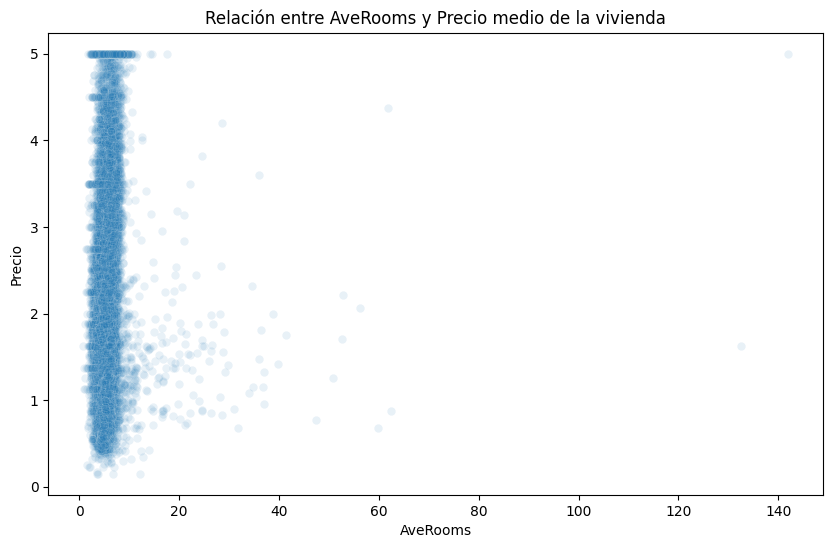

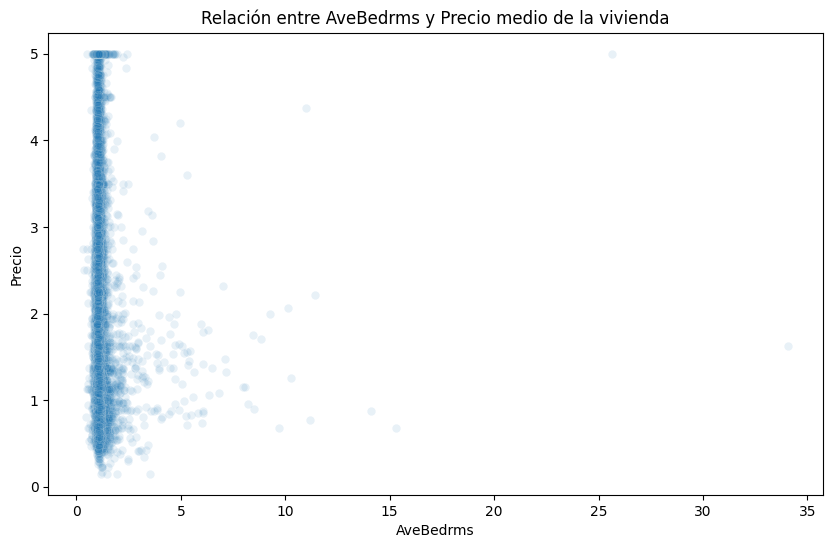

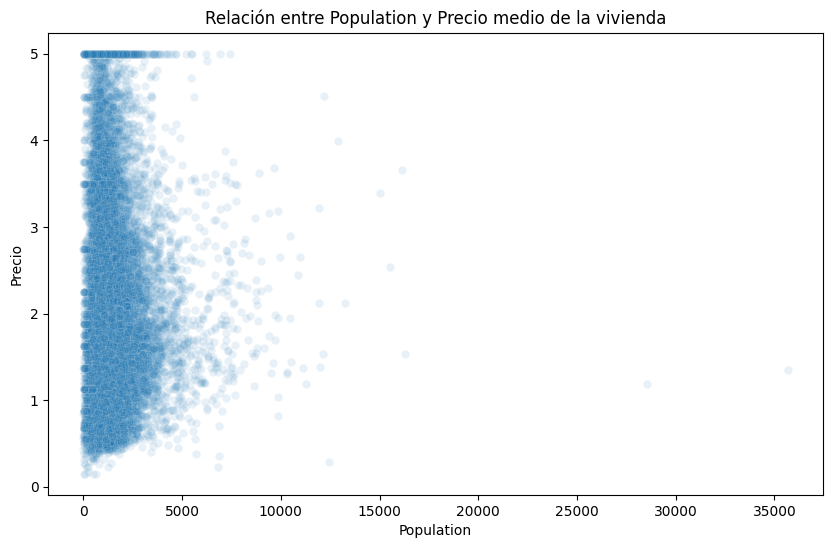

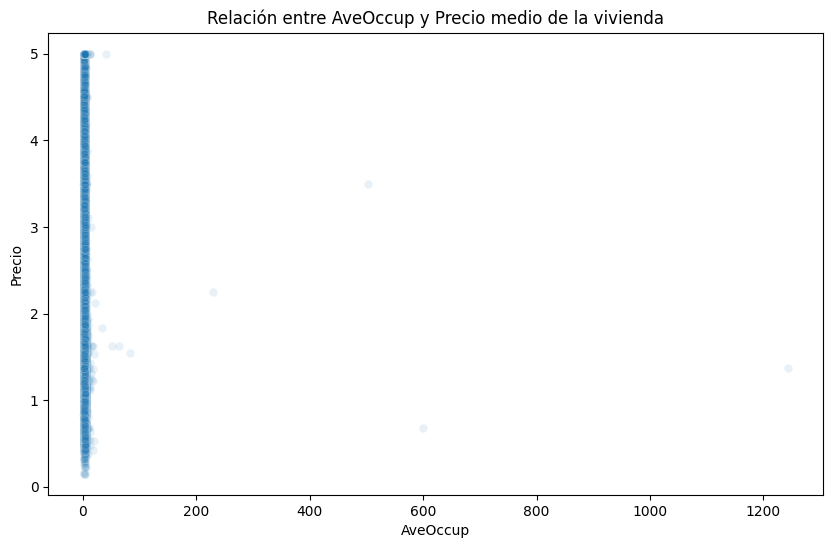

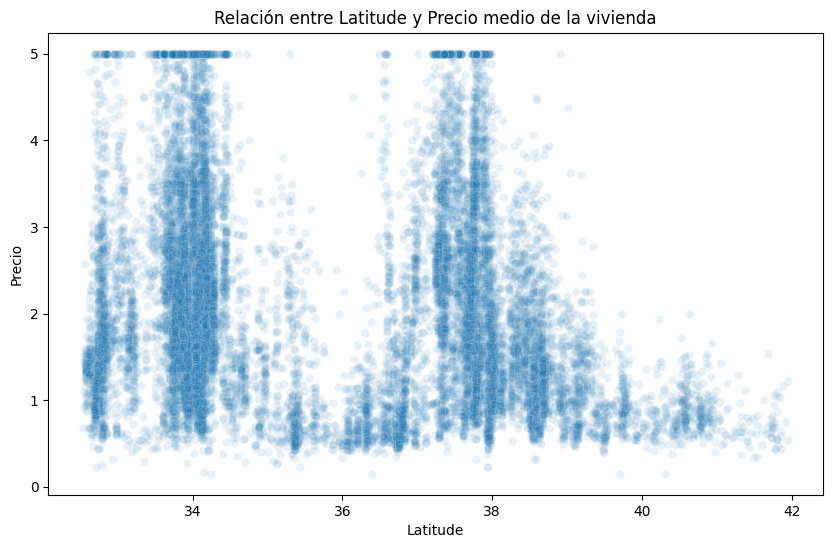

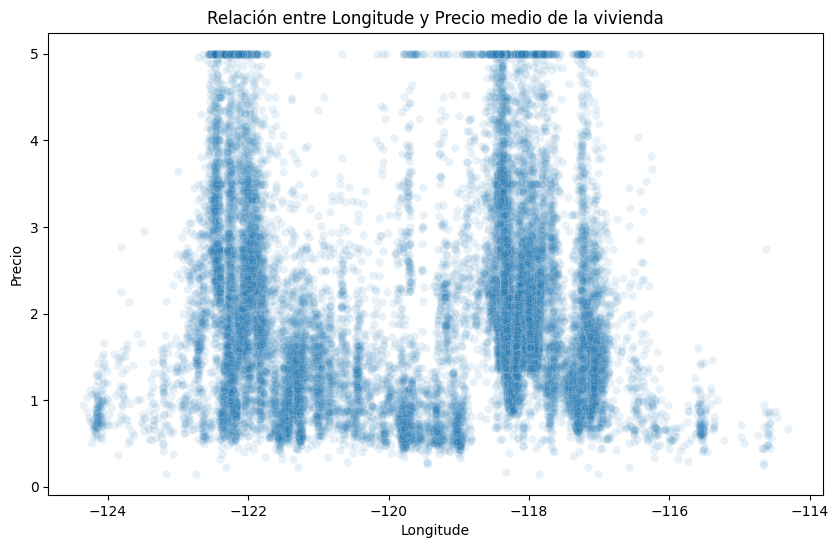

In [8]:
# Visualiaciones de relaciones entre features y Price

for feature in features_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature], y=df['Price'], alpha=0.1)
    plt.title(f'Relación entre {feature} y Precio medio de la vivienda')
    plt.xlabel(feature)
    plt.ylabel('Precio')
    plt.show();


## Preprocesado de datos

In [9]:
# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=73)

# Escalado de datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




## Construir el Modelo

In [10]:
def build_model(input_shape, learning_rate=0.001):
    model = keras.Sequential(
        [            
            layers.Dense(128, activation='relu',input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(1)
        ]
    )
    
    optimizador = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer = optimizador,
        loss='mse',
        metrics =['mae']
    )
    return model

In [11]:
model = build_model(input_shape=X_train_scaled.shape[1])
model.summary()

c:\Users\javier.sdiaz\Desktop\BootCamp\DS102024\3-MachineLearning\7-DeepLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# Callback de entrenamiento

early_stopping = keras.callbacks.EarlyStopping(
    patience= 30,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss'
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor=0.2,
    patience=10,
    min_lr=0.00001,
    monitor='val_loss'
)

In [13]:
# Entrenar el Modelo

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs = 300,
    batch_size = 32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.1242 - mae: 1.3419 - val_loss: 0.6331 - val_mae: 0.6032 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7405 - mae: 0.6365 - val_loss: 0.5249 - val_mae: 0.5169 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6037 - mae: 0.5754 - val_loss: 0.4262 - val_mae: 0.4634 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5237 - mae: 0.5313 - val_loss: 0.4153 - val_mae: 0.4670 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5074 - mae: 0.5201 - val_loss: 0.3671 - val_mae: 0.4276 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4680 - mae: 0.4978 - val_loss: 0.4098 - val_mae: 0.4366 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4628 - mae: 0.4898 - val_loss: 0.4158 - val_mae: 0.4313 - learning_rate: 0.0010

In [14]:
# Evaluar el modelo

test_mse, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f'Test Mean Squared Error (MSE): {mse:.4f}')
print(f'Test Mean Absolute Error (MAE): {mae:.4f}')
print(f'Test R-squared:{R2:.4f}')
print(f'Test Mean Absolute Percentage Error(MAPE):{mape:.4f}')
print(f'Test Root Mean Squared Error (RMSE):{rmse*100_000:.4f}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Test Mean Squared Error (MSE): 0.2911
Test Mean Absolute Error (MAE): 0.3659
Test R-squared:0.7853
Test Mean Absolute Percentage Error(MAPE):0.2026
Test Root Mean Squared Error (RMSE):53954.0385


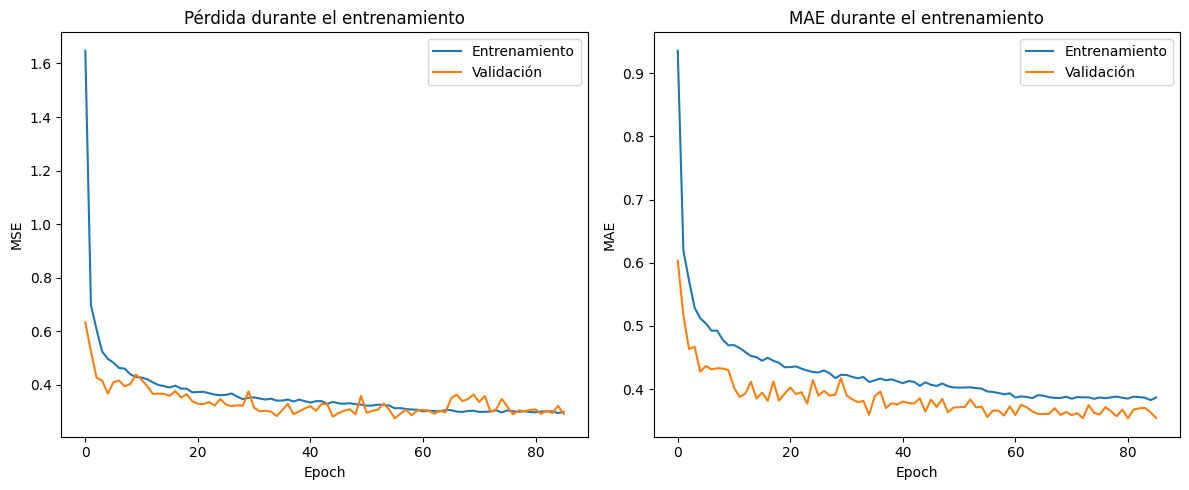

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Entrenamiento')
plt.plot(history.history['val_loss'],label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend();

plt.subplot(1,2,2)
plt.plot(history.history['mae'],label='Entrenamiento')
plt.plot(history.history['val_mae'],label='Validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend();

plt.tight_layout()
plt.show()

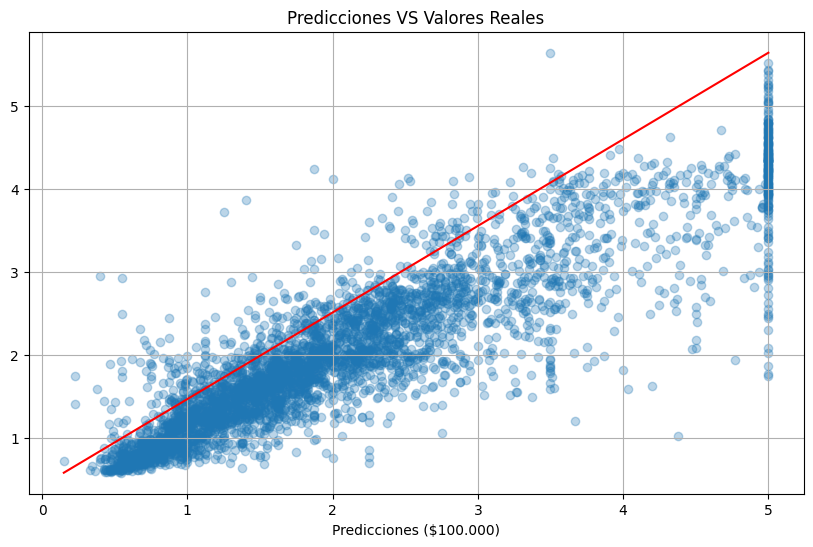

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.plot([y_test.min(),y_test.max(),],[y_pred.min(),y_pred.max()],color='r')
plt.xlabel('Precios reales ($100.000)')
plt.xlabel('Predicciones ($100.000)')
plt.title('Predicciones VS Valores Reales')
plt.grid(True)
plt.show();

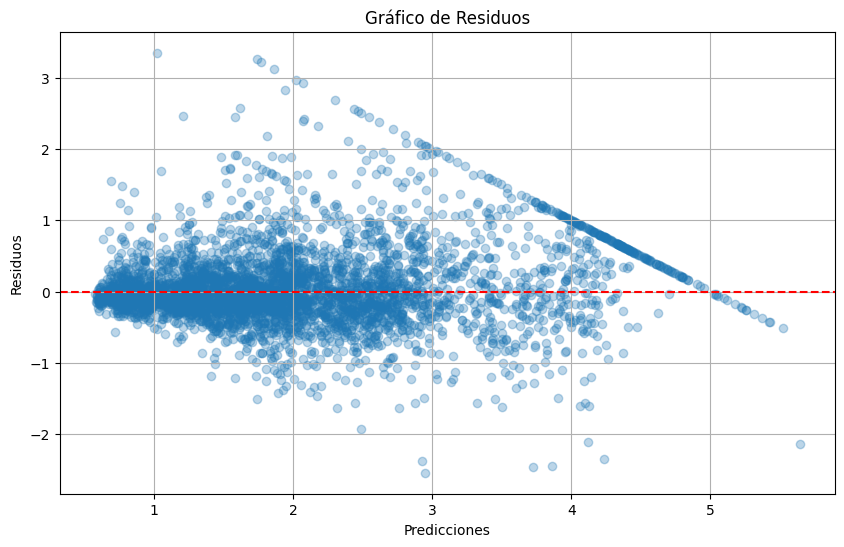

In [17]:
residuos = y_test - y_pred.flatten()

plt.figure(figsize=(10,6))

plt.scatter(y_pred, residuos, alpha=0.3)
plt.axhline(y=0, color='r',linestyle='--')

plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True)
plt.show();

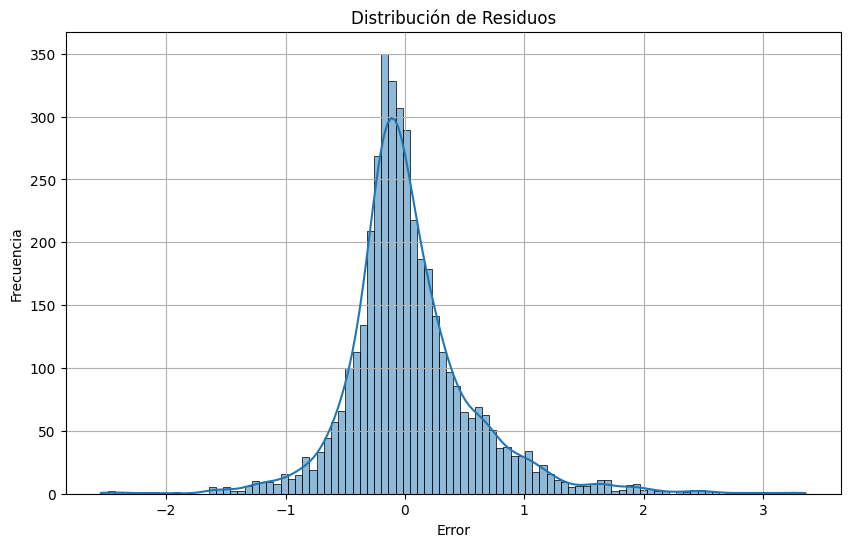

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show();

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=73)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature.importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.title('Importancia de las características')
plt.tight_layout()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'feature'